# Long Term Interest Rate Dataset Cleaning

In [11]:
import pandas as pd

In [12]:
ir = pd.read_csv('../data/uncleaned/long_term_ir.csv')
ir

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,PRT,LTINT,TOT,PC_PA,A,1994,10.478330,NaN
1,PRT,LTINT,TOT,PC_PA,A,1995,11.465000,NaN
2,PRT,LTINT,TOT,PC_PA,A,1996,8.559167,NaN
3,PRT,LTINT,TOT,PC_PA,A,1997,6.358333,NaN
4,PRT,LTINT,TOT,PC_PA,A,1998,4.877500,NaN
...,...,...,...,...,...,...,...,...
27434,ROU,LTINT,TOT,PC_PA,M,2022-10,9.130000,NaN
27435,ROU,LTINT,TOT,PC_PA,M,2022-11,7.650000,NaN
27436,ROU,LTINT,TOT,PC_PA,M,2022-12,7.170000,NaN
27437,ROU,LTINT,TOT,PC_PA,M,2023-01,6.800000,NaN


**This Dataset has about 27.5k records for 8 features**

In [13]:
for col in ir.keys():
    ir[col]
    print(col,ir[col].isnull().values.any())

LOCATION False
INDICATOR False
SUBJECT False
MEASURE False
FREQUENCY False
TIME False
Value False
Flag Codes True


**No feature except Flag Codes has null values**

In [14]:
ir.nunique()

LOCATION         47
INDICATOR         1
SUBJECT           1
MEASURE           1
FREQUENCY         3
TIME           1187
Value         13034
Flag Codes        1
dtype: int64

In [15]:
ir['FREQUENCY'].unique()

array(['A', 'M', 'Q'], dtype=object)

**Data is recorded for 3 frequencies -> ['A', 'Q', 'M']. We only take Annual (A) data.**

In [16]:
ir = ir[(ir['FREQUENCY']=='A')]
print(ir.shape)

(1587, 8)


**After filtering for Annual occuring data, 1587 records are left.**

In [17]:
ir

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,PRT,LTINT,TOT,PC_PA,A,1994,10.478330,NaN
1,PRT,LTINT,TOT,PC_PA,A,1995,11.465000,NaN
2,PRT,LTINT,TOT,PC_PA,A,1996,8.559167,NaN
3,PRT,LTINT,TOT,PC_PA,A,1997,6.358333,NaN
4,PRT,LTINT,TOT,PC_PA,A,1998,4.877500,NaN
...,...,...,...,...,...,...,...,...
26551,ROU,LTINT,TOT,PC_PA,A,2018,4.686666,NaN
26552,ROU,LTINT,TOT,PC_PA,A,2019,4.539166,NaN
26553,ROU,LTINT,TOT,PC_PA,A,2020,3.893333,NaN
26554,ROU,LTINT,TOT,PC_PA,A,2021,3.625000,NaN


In [18]:
min_year = int(ir['TIME'].min())
# int(group['time'].min())
max_year = int(ir['TIME'].max())
sorted_cont = ir['LOCATION'].unique()
sorted_cont.sort()
for cont in sorted_cont:
    years = []
    for y in range(min_year,max_year):
        if (str(y) not in ir[ir['LOCATION']==cont]['TIME'].astype("string").values):
            years.append(y)
    if len(years)!=0:
        print(cont, years)

AUS [1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969]
AUT [1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989]
BEL [1954]
BGR [1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002]
BRA [1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994]
CAN [1954]
CHE [1954]
CHL [1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 

**Above are all the years that each country is missing the data for. It'll help us in determining the countries and years to choose for our model**

In [19]:
#Dropping superfluous columns
ir = ir.drop(['INDICATOR','SUBJECT','MEASURE','FREQUENCY','Flag Codes'],axis=1,errors='ignore')
ir

,LOCATION,TIME,Value
0,PRT,1994,10.478330
1,PRT,1995,11.465000
2,PRT,1996,8.559167
3,PRT,1997,6.358333
4,PRT,1998,4.877500
...,...,...,...
26551,ROU,2018,4.686666
26552,ROU,2019,4.539166
26553,ROU,2020,3.893333
26554,ROU,2021,3.625000


{'whiskers': [<matplotlib.lines.Line2D at 0x1461a0f40>,
 'caps': [<matplotlib.lines.Line2D at 0x1461e8160>,
 'boxes': [<matplotlib.lines.Line2D at 0x1461a0ca0>],
 'medians': [<matplotlib.lines.Line2D at 0x1461e8700>],
 'fliers': [<matplotlib.lines.Line2D at 0x1461e89a0>],
 'means': []}

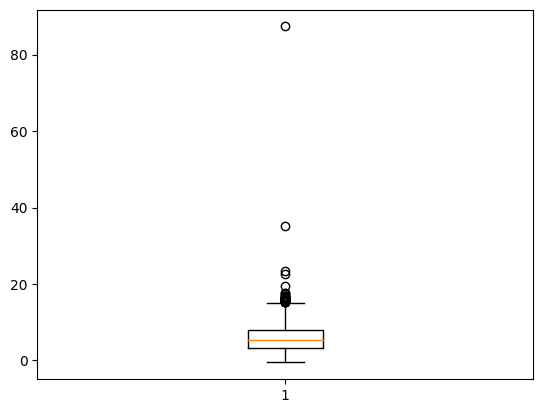

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.boxplot(ir['Value'])

**We see a few outliers according to the box plot here, but the interest rate tends to increase over the years and varies for countries. Becasue of temportal data in this case, we cannot remove the outliers.**

In [21]:
ir.to_csv('../data/temp/long_term_ir_cleaned.csv',index=False,mode='wb')

# EDA

### Statistical Measures of the feature:

In [22]:
ir.describe()

,Value
count,1587.000000
mean,5.914268
std,4.318848
min,-0.523833
25%,3.317584
50%,5.308737
75%,8.075000
max,87.375830


### Data Types of the Columns:

In [23]:
ir.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1587 entries, 0 to 26555
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LOCATION  1587 non-null   object 
 1   TIME      1587 non-null   object 
 2   Value     1587 non-null   float64
dtypes: float64(1), object(2)
memory usage: 49.6+ KB


### Number of rows:

In [24]:
ir.shape[0]

1587